In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from ipywidgets import interactive, IntSlider, Output


In [4]:
stations = pd.read_excel('../data/historical-station-counts.xlsx')
st_stations = pd.read_csv('../output/station_counts_by_state.csv')

In [5]:
stations.dropna()

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total
0,Alabama,10.0,30.0,31.0,326 | 848,0 | 0 | 0,2.0,29 | 33 | 62,983.0
2,Alaska,0.0,1.0,0.0,62 | 115,0 | 0 | 0,0.0,1 | 1 | 2,118.0
4,Arizona,75.0,28.0,17.0,"977 | 2,638",0 | 1 | 1,5.0,38 | 27 | 65,2829.0
6,Arkansas,17.0,10.0,74.0,222 | 598,0 | 0 | 0,0.0,17 | 19 | 36,735.0
8,California,32.0,314.0,326.0,"14,616 | 43,400",53 | 5 | 58,40.0,128 | 118 | 246,44416.0
10,Colorado,5.0,27.0,95.0,"1,788 | 4,411",0 | 1 | 1,1.0,27 | 22 | 49,4589.0
12,Connecticut,1.0,13.0,3.0,"593 | 1,638",0 | 0 | 0,0.0,8 | 10 | 18,1673.0
14,Delaware,0.0,2.0,2.0,156 | 367,0 | 1 | 1,0.0,7 | 12 | 19,391.0
16,District of Columbia,9.0,3.0,4.0,300 | 970,0 | 0 | 0,0.0,0 | 6 | 6,992.0
18,Florida,5.0,52.0,143.0,"2,913 | 7,802",0 | 0 | 0,3.0,74 | 51 | 125,8130.0


In [6]:
st_stations

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,year
0,Alabama,10.0,30.0,31.0,848,0.0,2.0,62.0,983.0,2022
1,Alaska,0.0,1.0,0.0,115,0.0,0.0,2.0,118.0,2022
2,Arizona,75.0,28.0,17.0,"2,638",1.0,5.0,65.0,2829.0,2022
3,Arkansas,17.0,10.0,74.0,598,0.0,0.0,36.0,735.0,2022
4,California,32.0,314.0,326.0,"43,400",58.0,40.0,246.0,44416.0,2022
...,...,...,...,...,...,...,...,...,...,...
811,Virginia,18.0,9.0,5.0,0.0,1.0,0.0,21.0,54.0,2007
812,Washington,37.0,13.0,7.0,0.0,0.0,0.0,55.0,112.0,2007
813,West Virginia,0.0,2.0,3.0,0.0,0.0,0.0,7.0,12.0,2007
814,Wisconsin,4.0,19.0,84.0,0.0,0.0,0.0,45.0,152.0,2007


In [7]:
st_stations.columns = st_stations.columns.str.lower()

In [8]:
st_stations.electric = st_stations.electric.str.replace(',', '').astype(float)

In [9]:
stations_year = st_stations.groupby('year').mean()
stations_electric = st_stations.groupby('state').mean()

In [10]:
stations_electric.reset_index(inplace=True)

In [11]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,Alaska,1.8125,3.8125,4.8125,26.3125,0.0000,0.3125,24.6875,61.7500,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5


In [12]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

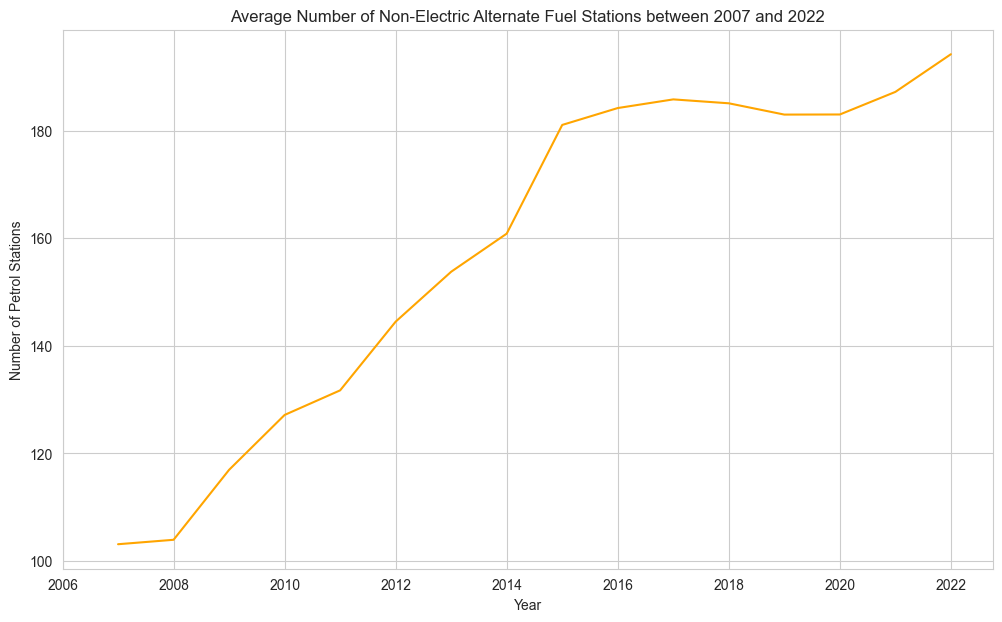

In [13]:
plt.figure(figsize = (12, 7))


plt.plot(st_stations.groupby('year').mean().total - st_stations.groupby('year').mean().electric, color = 'orange')
plt.xlim(2006)
plt.title('Average Number of Non-Electric Alternate Fuel Stations between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Petrol Stations');

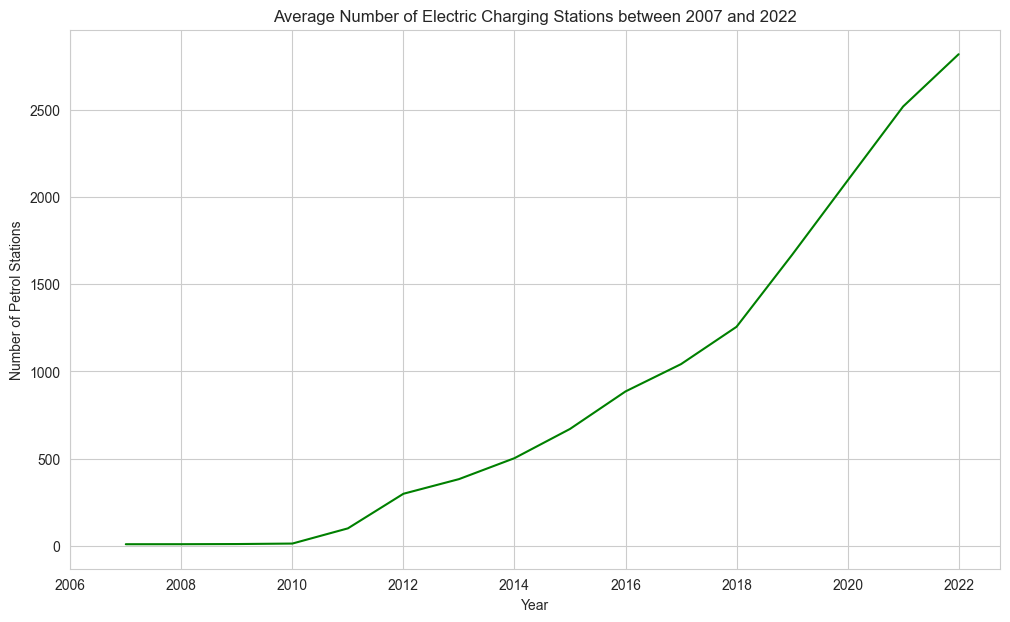

In [14]:
plt.figure(figsize = (12, 7))

plt.plot(st_stations.groupby('year').mean().electric, color = 'green')
plt.xlim(2006)
plt.title('Average Number of Electric Charging Stations between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Petrol Stations');

.

## Geopandas EDA Section
.
---

In [15]:
states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
type(states)

states = states.to_crs("EPSG:3395")

In [16]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-13051434.065 5496245.142 0.000, -..."
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-10186420.016 4867556.657 0.000, -..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-10755897.924 5249403.215 0.000, -..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-9968040.796 4354501.406 0.000, -9..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-10468824.609 3831551.686 0.000, -..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,MULTIPOLYGON Z (((-8465425.708 4556708.788 0.0...


In [17]:
stations_electric.drop([1, 11], inplace = True)

In [18]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [19]:
states.sort_values('NAME')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
41,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9..."
19,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -..."
20,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -..."
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
21,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -..."
50,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8..."
23,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8..."
39,10,01779781,0400000US10,10,DE,Delaware,00,5047093738,1398754502,Northeast,"POLYGON Z ((-8435099.273 4798343.346 0.000, -8..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...


In [20]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [21]:
states = states.sort_values('NAME')

In [22]:
states.rename(columns = {
    'NAME' : 'state'
}, inplace = True)

In [23]:
states_electric = pd.merge(states, stations_electric)

states_electric.dropna(inplace=True)

In [24]:
states_electric

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,state,LSAD,ALAND,AWATER,region,geometry,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9...",7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -...",46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
2,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -...",11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
3,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
4,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -...",14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
5,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8...",1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
6,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8...",1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,10,01779781,0400000US10,10,DE,Delaware,00,5047093738,1398754502,Northeast,"POLYGON Z ((-8435099.273 4798343.346 0.000, -8...",1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8...",5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5


Text(-0.05, 0.5, '')

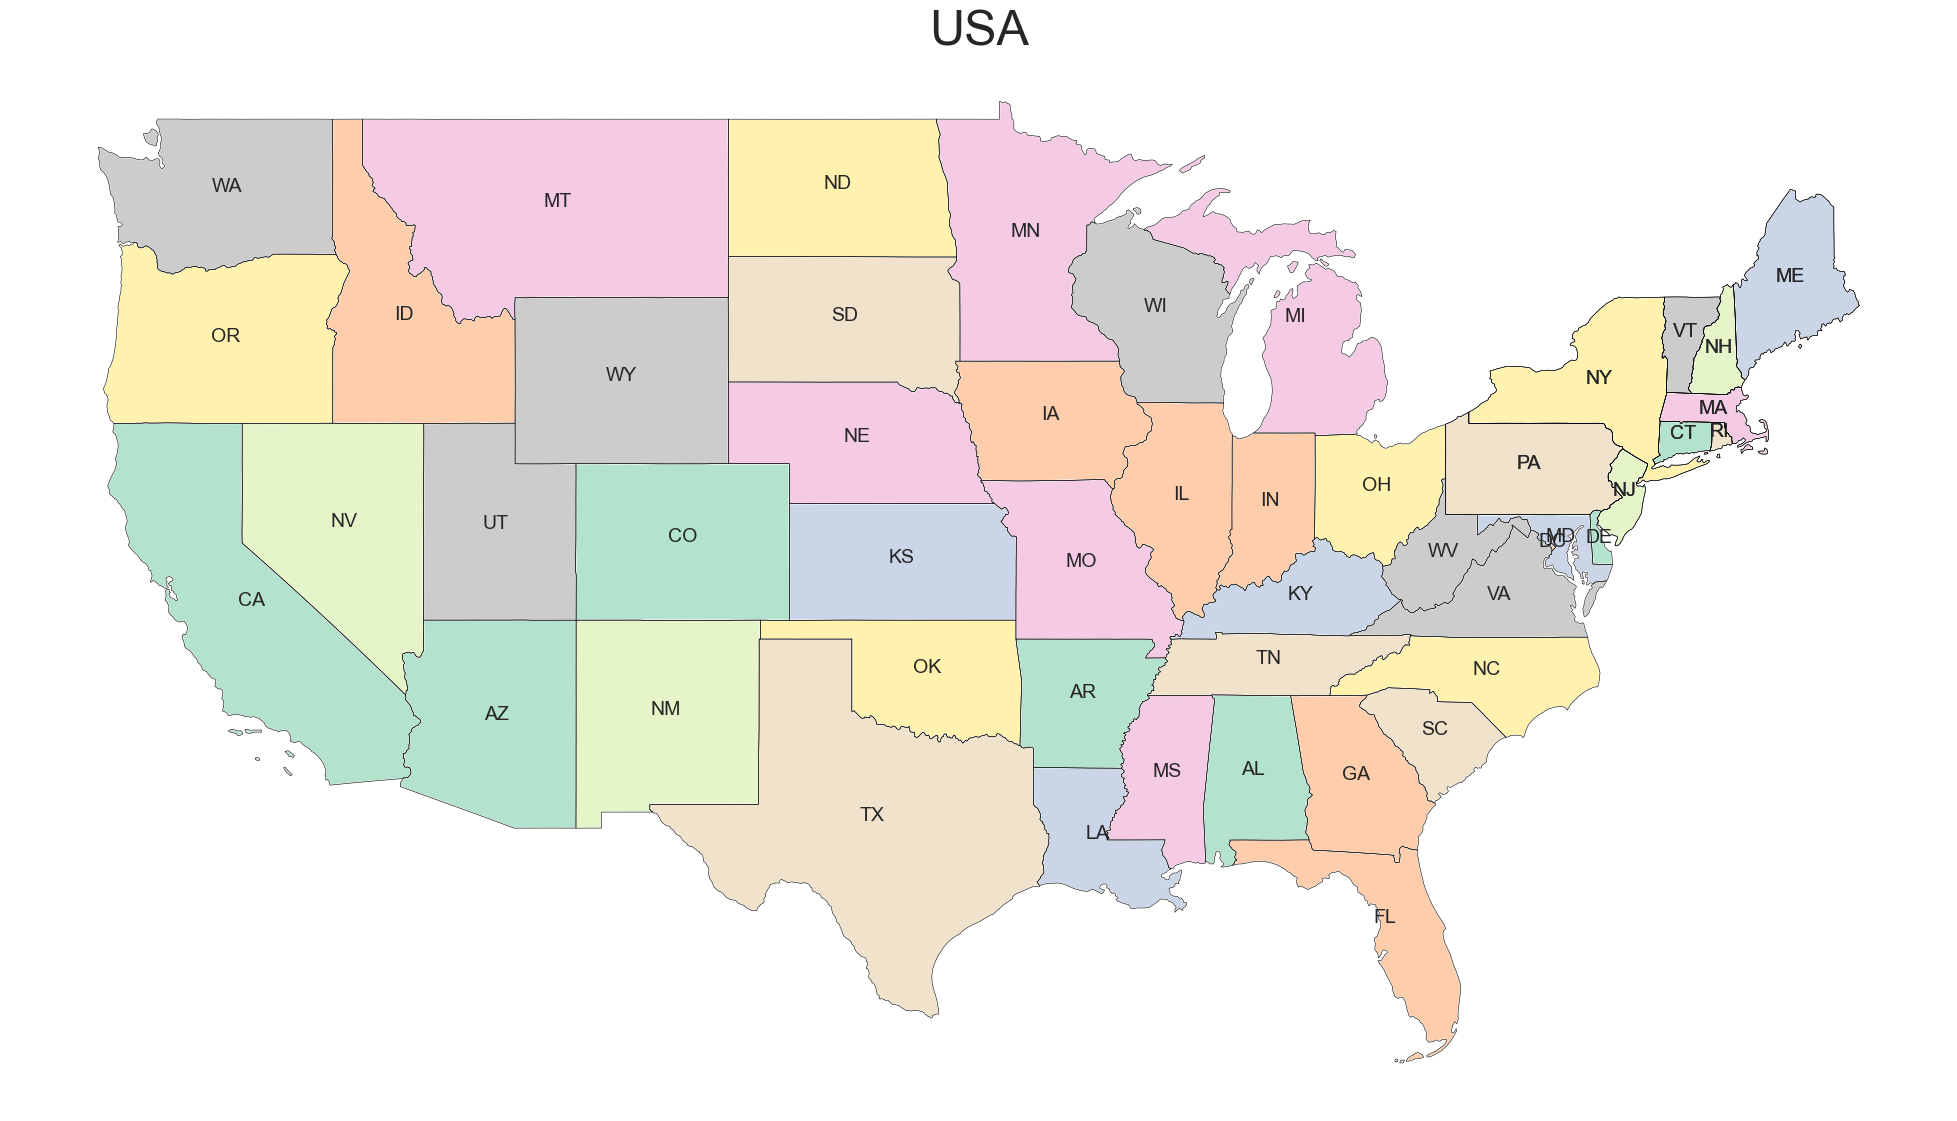

In [25]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

states_electric.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);

states_electric.boundary.plot(ax=ax, color='Black', linewidth=.4)

states_electric.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

plt.axis('off')
plt.title('USA', fontsize = 35)
ax.text(-0.05, 0.5, '',transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='center', va='center', rotation='vertical')

In [26]:
states.drop_duplicates(keep = 'first', inplace=True)

In [27]:
states.shape

(49, 11)

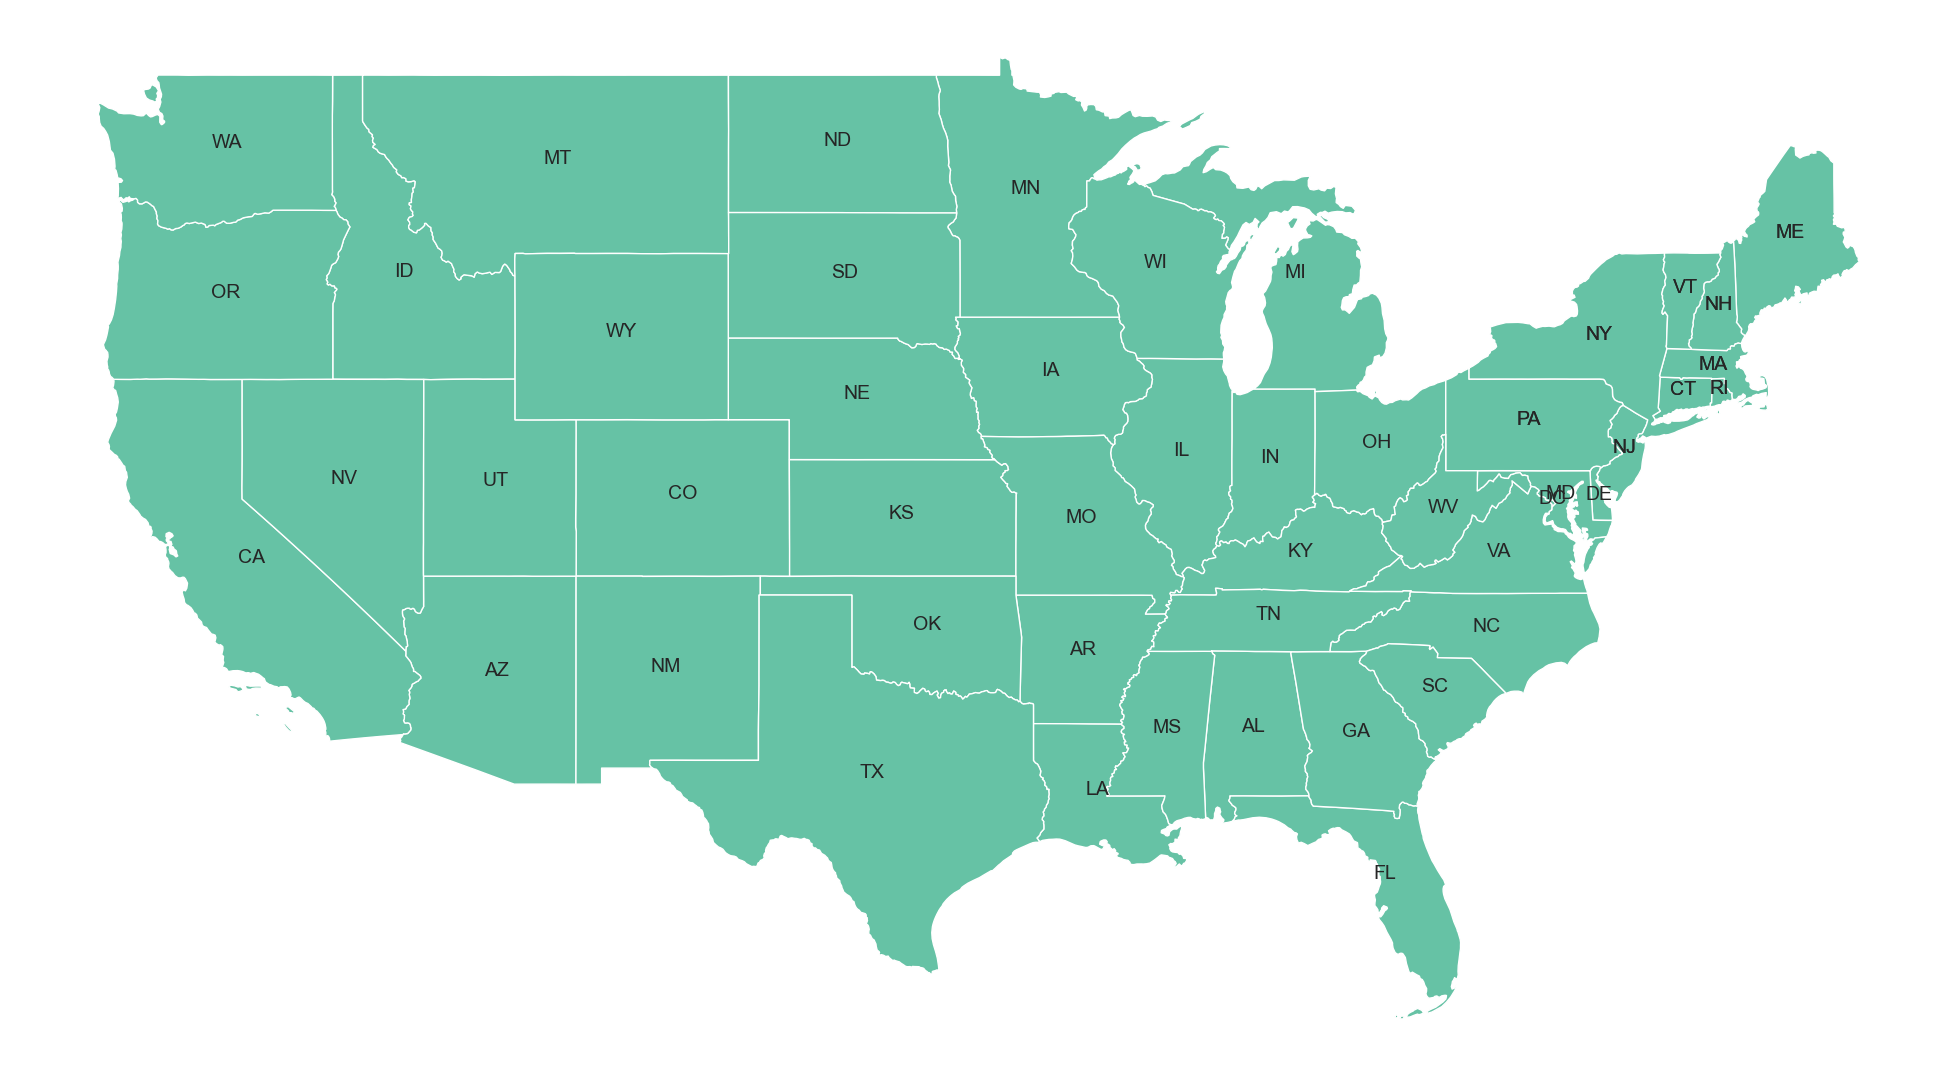

In [28]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
plt.axis('off')
states_electric.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
states.plot(ax=ax, figsize=(12, 12))
plt.show()

In [29]:
aq = pd.read_csv('../output/air_quality_by_state.csv')

In [30]:
aq.replace('Alaska', np.nan).dropna(inplace = True)
aq.replace('Hawaii', np.nan).dropna(inplace = True)
aq.replace('District Of Columbia', np.nan).dropna(inplace = True)


In [31]:
aq.pct_unhealthy_for_sensitive_groups_days = aq.pct_unhealthy_for_sensitive_groups_days * 100

In [32]:
st_stations.replace('Alaska', np.nan).dropna(inplace = True)
st_stations.replace('Hawaii', np.nan).dropna(inplace = True)


In [33]:
pops = pd.read_csv('../data/state-populations.csv')
pops2 = pd.read_csv('../data/state-populations-2020-2022.csv')

In [34]:
pops2

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,40,4,9,53,Washington,7705247,7724031,7740745,7785786,18784,...,8.400898,9.117040,2.264113,1.737928,1.809144,4.831987,-1.990071,-0.461146,-0.180927,4.370841
62,40,3,5,54,West Virginia,1793755,1791420,1785526,1775156,-2335,...,15.341020,16.649619,-5.665727,-6.829029,0.406492,0.995877,1.602484,0.266241,2.008976,1.262118
63,40,2,3,55,Wisconsin,5893725,5896271,5880101,5892539,2546,...,10.496442,10.770227,-0.305357,-0.298659,0.541593,1.388643,-3.209987,1.300813,-2.668394,2.689456
64,40,4,8,56,Wyoming,576837,577605,579483,581381,768,...,10.706187,11.506947,-0.063954,-0.844199,0.233344,0.589216,3.085331,3.707583,3.318676,4.296800


In [35]:
pops = pops.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia']
            , np.nan).dropna()
pops2 = pops2.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 
              'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia',
              'New England', 'Middle Atlantic', 'East North Central', 'West North Central',
              'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'
                      ]
            , np.nan).dropna()

In [36]:
pops2.shape

(48, 45)

In [37]:
pops.columns = pops.columns.str.lower()
pops2.columns = pops2.columns.str.lower()

In [38]:
pops = pops.loc[:, ['name', 
                                'popestimate2010', 
                                'popestimate2011', 
                                'popestimate2012', 
                                'popestimate2013', 
                                'popestimate2014', 
                                'popestimate2015', 
                                'popestimate2016', 
                                'popestimate2017', 
                                'popestimate2018', 
                                'popestimate2019'
                               ]]
pops2 = pops2.loc[:,['name', 'popestimate2020', 'popestimate2021','popestimate2022',]]

In [39]:
pops.shape, pops2.shape

((48, 11), (48, 4))

In [40]:
populations = pd.merge(pops, pops2)

In [41]:
populations.shape

(48, 14)

In [42]:
populations = populations.melt(id_vars=['name'], var_name='year', value_name='population')


In [43]:
populations.year = populations.year.str[-4:]

In [44]:
populations.rename(columns = {
    'name' : 'state'
}, inplace = True)

In [45]:
populations.year = populations.year.astype(int)

In [46]:
pop_stations = st_stations[st_stations.year > 2009]
pop_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 662
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      663 non-null    object 
 1   biodiesel  663 non-null    float64
 2   cng        663 non-null    float64
 3   e85        663 non-null    float64
 4   electric   663 non-null    float64
 5   hydrogen   663 non-null    float64
 6   lng        663 non-null    float64
 7   propane    663 non-null    float64
 8   total      663 non-null    float64
 9   year       663 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 57.0+ KB


In [47]:
pop_stations = populations.merge(pop_stations, on = ['state', 'year'])

In [48]:
pop_stations.head()

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total
0,Alabama,2010,4785437,5.0,4.0,15.0,0.0,0.0,1.0,128.0,153.0
1,Arizona,2010,6407172,14.0,36.0,32.0,8.0,1.0,5.0,61.0,157.0
2,Arkansas,2010,2921964,6.0,4.0,13.0,1.0,0.0,0.0,51.0,75.0
3,California,2010,37319502,35.0,213.0,54.0,428.0,22.0,32.0,227.0,1011.0
4,Colorado,2010,5047349,14.0,23.0,86.0,5.0,1.0,0.0,50.0,179.0


In [49]:
pop_stations['electric_by_pop'] = pop_stations.electric / (pop_stations.population / 10_000)

In [50]:
pop_stations[pop_stations.state == 'West Virginia']

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
45,West Virginia,2010,1854239,1.0,1.0,3.0,0.0,1.0,0.0,8.0,14.0,0.000000
93,West Virginia,2011,1856301,2.0,17.0,140.0,60.0,0.0,0.0,48.0,267.0,0.323223
141,West Virginia,2012,1856872,4.0,31.0,126.0,185.0,0.0,1.0,51.0,398.0,0.996299
189,West Virginia,2013,1853914,4.0,45.0,115.0,211.0,0.0,1.0,54.0,430.0,1.138133
237,West Virginia,2014,1849489,2.0,3.0,9.0,101.0,0.0,0.0,12.0,127.0,0.546097
285,West Virginia,2015,1842050,2.0,3.0,9.0,68.0,0.0,0.0,16.0,98.0,0.369154
333,West Virginia,2016,1831023,2.0,4.0,11.0,96.0,0.0,0.0,13.0,126.0,0.524297
381,West Virginia,2017,1817004,2.0,3.0,33.0,199.0,0.0,0.0,10.0,247.0,1.095209
429,West Virginia,2018,1804291,2.0,3.0,33.0,212.0,0.0,0.0,10.0,260.0,1.174977
477,West Virginia,2019,1792147,0.0,3.0,34.0,244.0,0.0,0.0,14.0,295.0,1.361495


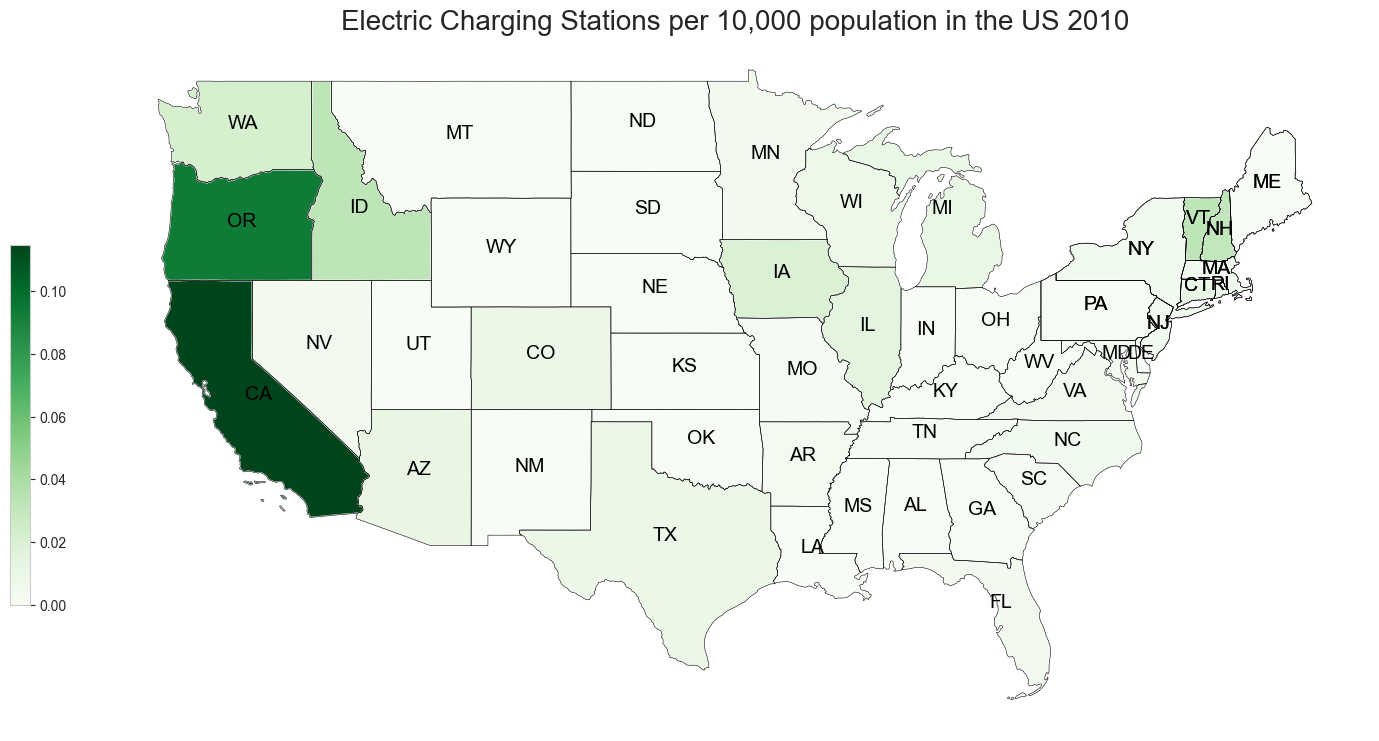

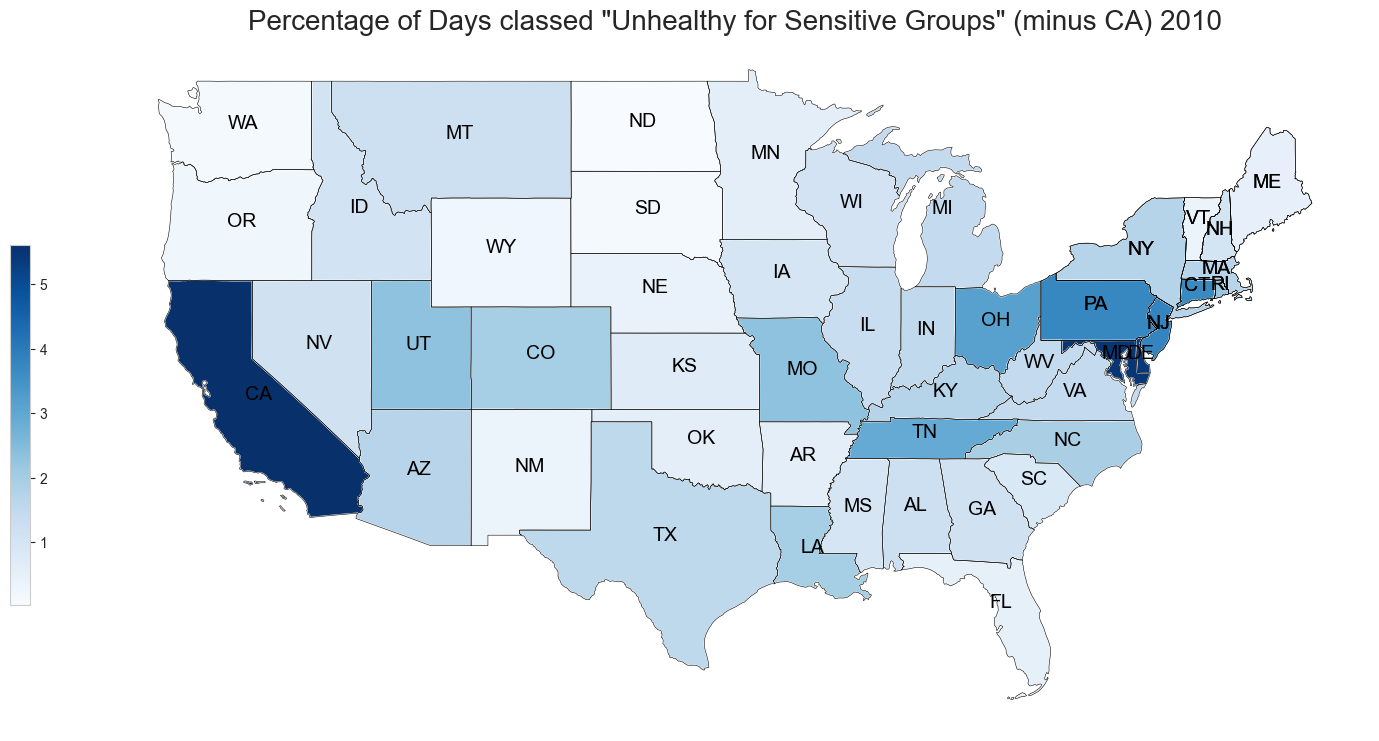

Output()

In [51]:
cmap = 'Greens'

slider = IntSlider(min=2010, max=2022, step=1, value=0, description='Year')

output = Output()

def plot_heatmap(year):
    output.clear_output(wait=True)
    cmap_e = 'Greens'
    year_stations = pop_stations[pop_stations.year == year]
    states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
    states = states.to_crs("EPSG:3395")
    states = states.sort_values('NAME')
    states.rename(columns={
        'NAME': 'state'
    }, inplace=True)
    year_stations = pd.merge(states, year_stations)
    year_stations.dropna(inplace=True)
    vmin_e = year_stations['electric_by_pop'].min()
    vmax_e = year_stations['electric_by_pop'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_stations.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_stations.boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_stations.plot(column='electric_by_pop', ax=ax, linewidth=1, cmap=cmap_e)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_e, vmax=vmax_e), cmap=cmap_e)
        sm._A = []
        ax.set_title(f'Electric Charging Stations per 10,000 population in the US {year}', fontsize=20)
        ax.text(-0.05, 0.5, '', transform=ax.transAxes,
                fontsize=15, color='gray', alpha=0.5,
                ha='center', va='center', rotation='vertical')
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)
        
#     output.clear_output(wait=True)
    cmap_aq = 'Blues'
    year_aq = aq[aq.year == year]
#     states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
#     states = states.to_crs("EPSG:3395")
#     states = states.sort_values('NAME')
#     states.rename(columns={
#         'NAME': 'state'
#     }, inplace=True)
    year_aq = pd.merge(states, year_aq)
    year_aq.dropna(inplace=True)
    vmin_aq = year_aq['pct_unhealthy_for_sensitive_groups_days'].min()
    vmax_aq = year_aq['pct_unhealthy_for_sensitive_groups_days'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_aq.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_aq.boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_aq.plot(column='pct_unhealthy_for_sensitive_groups_days', ax=ax, linewidth=1, cmap=cmap_aq)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_aq, vmax=vmax_aq), cmap=cmap_aq)
        sm._A = []
        ax.set_title(f'Percentage of Days classed "Unhealthy for Sensitive Groups" (minus CA) {year}', fontsize=20)
        ax.text(-0.05, 0.5, '', transform=ax.transAxes,
                fontsize=15, color='gray', alpha=0.5,
                ha='center', va='center', rotation='vertical')
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

slider = interactive(plot_heatmap, year=slider)
display(slider, output)

In [52]:
st_stations.drop([1,11], inplace = True)